In [1]:
from preamble import *
%matplotlib inline

# Introduction

## Course metadata

- Course curators and instructors
  - Fibinse
  - Shubham
  - Sumukh
- Duration 
  - 7 sessions (every Tue and Thu, 5pm - 6pm)
- Content sources
  - https://github.com/amueller/introduction_to_ml_with_python
  - https://github.com/justmarkham
  - Books 
    - Introduction to Machine Laerning with Python
    - The Elements of Statistical Learning 
      - available online for free on the author's website
        http://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf
  - Kaggle Learn
  - other sources referenced inline in the content
- Notation
  - notebooks contain cells with textual description, instructions that require you to act, and outputs. In order to help differentiate the cells, the instructions that require you to act are prefixed by an indent and appear as shown below. Empty cells that follow the instruction should be used to run code:
  > do something
  - Code within text is highlighted in this fashion ``` code sample ```


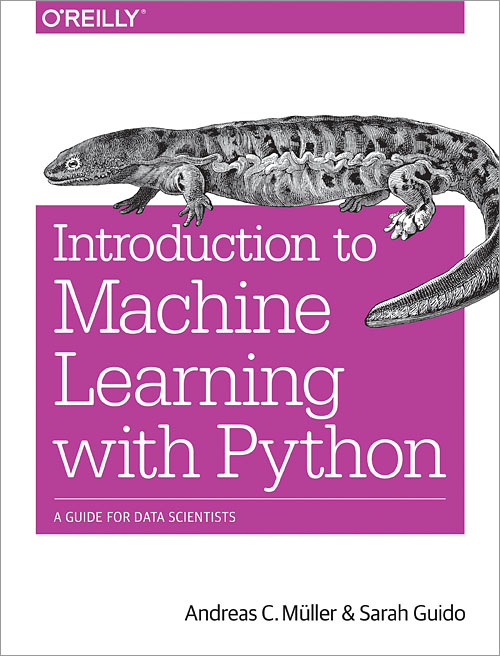

## Course outline

1. Introduction
2. Model evaluation
   - Precision / Recall
   - Underfitting / Overfitting
   - Holdout
   - Cross validation
3. Regression
   - Linear regression
   - Ridge
   - Lasso
4. Classifiers
   - Logistic regression
   - Linear SVM
5. Classifiers contd..
   - Decision trees
   - Random forests
   - Naive Bayes
6. Data pre-processing
   - Data transformation
   - Dimentionality reduction 
   - Pipelines
   - Grid search
7. Clustering
   - Kmeans
   - Hierarchical clustering

## Primary libraries/toolkits

Some snippets describing the packages from their respective webpages

### pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

https://pandas.pydata.org

### numpy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

http://www.numpy.org

### matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms

https://matplotlib.org

### seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics

https://seaborn.pydata.org

### scikit-learn

Machine learning in Python
- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

https://scikit-learn.org

# Exploring Data with Pandas

The operations in pandas should be familiar to anyone who has worked with SQL. The concepts of selection, aggregation, joins are common to pandas and SQL. The equivalent of a table in SQL is the dataframe in pandas.

Data manipulation is easier using Pandas than with SQL.

Pandas only works in memory whereas SQL can work over very large datasets.

One key difference between relational databases and pandas is in the logical structure of data. While relational databases treat tables as sets of records, the rows in a dataframe are ordered by their index. This allows us to perform list operations on records in a dataframe. It's equivalent is not always available in SQL.

## Basics

### import
import pandas using the following command

```import pandas as pd```

### data structures
Two main data structures for working with data
- Series 
  - a one dimensional array of values 
- Dataframe
  - a two dimensional table of columns and rows
  - each column in a dataframe is a series

### load data

``` df = pd.read_csv(file_path) ```

### shape

``` df.shape ```

### head

``` df.head() ```

``` df.sample() ```

### index and columns

- index
- multi-level index
- columns
- rename

``` df.index ```

``` df.columns ```

``` df.rename(columns={}) ```

### summary statistics

- count
- mean
- min 
- max
- percentiles

``` df.describe() ```

### data types

- categorical
- numeric
- ordinal

``` df.dtypes ```

### ML dataset nomenclature

- feature / attribute
- instance

***

For hands on data-exploration we'll use the Wine Quality dataset from UCI data repository: https://archive.ics.uci.edu/ml/datasets/wine+quality

Reference:
<div> P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009. </div>

The above data has been downloaded into `data/winequality` folder

> import pandas

In [6]:
import pandas as pd

Files for red wine and white wine are present in the following folders:

```
data/winequality/winequality-red.csv
data/winequality/winequality-white.csv
```

Print the top two lines from the red wine data

In [2]:
!head -n 2 data/winequality/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


> Load the red wine and white wine data into dataframes called red_df and white_df, respectively

> Print shapes of the files to ensure the data were loaded successfully

In [12]:
print(f'red_df shape: {}; white_df shape: {}') 

red_df shape: (1599, 12); white_df shape: (4898, 12)


> Print a sample of 5 rows from each of the dfs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
697,7.0,0.65,0.02,2.10,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
956,9.0,0.36,0.52,2.10,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6
808,7.4,0.53,0.12,1.90,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,5
1037,7.3,0.91,0.10,1.80,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5


> Print the index and view output

RangeIndex(start=0, stop=1599, step=1)

> Print columns in red_df

> Rename all columns to lowercase and use underscore in place of space 

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

> Print summary statistics 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> Compare the alcohol content in red wine vs white wine for this dataset

## Indexing

- 33.33% of the 15 top voted questions in pandas StackOverflow were related to indexing
- different ways of performing the same operation

### selecting a column 

Columns can be selected in the following way if the column name is a valid python variable

``` df.column_name ```

Otherwise, a column can be selected as follows:

``` df['column name'] ```

Selecting multiple columns:

``` df[['column name 1', 'column name 2', 'column name 3', 'column name 4']] ```

### selecting rows and columns by position

For row and column selection by position: ``` df.ix[row_positions, col_positions] ``` 

For only row selection ``` df.ix[row_positions] ```

### selecting rows and columns by value

For row and column selection by value: ``` df.ix[row_condition, col_condition] ``` 

### creating new columns

``` df['new column'] = df.current_column.some_transform() ```

OR

``` df.loc[:, 'new column'] = df.current_column.some_transform() ```

Conditional assignment 

``` df.loc[<row select condition>, 'new column'] = df.current_column.some_transform() ```

Ensure indexes match on LHS and RHS in all the above statements.

To set a column to a fixed value use:

``` df['new column'] = value ```

OR

``` df.loc[:, 'new column'] = value ```

> Select red wines that have a volatile acidity greater than 1.1

> Create a column called `colour` in both red and white dataframes and assign the same to 'red' and 'white' respectively 

> Add a column called `quality_label` to both dataframes based on the following condition:
  - quality <= 5 is 'low'
  - quality > 5 and quality <= 7 is 'medium'
  - quality > 7 is 'high'

In [26]:
def quality_label(value):
  if value <= 5:
    return 'low'
  elif value <= 7:
    return 'medium'
  return 'high'

## Arithmetic Operations

Pandas objects have methods that calculate sum, mean, etc.

Operations may also be performed with scalars as shown below where a value of 1 is added to each element in the alcohol column of red_df

``` red_df.alcohol + 1 ```

python methods such as ``` len ``` and ``` round ``` can be applied to pandas objects

***

**Standardization** is the process of transforming different variables to a common scale. The equation to calculate the standardized value is given by:

$$ x_{i}^{std} = \frac{x_{i} - X_{mean}}{X_{sd}} $$

where:
- $x_{i} \in X$
- $X_{mean}$ is the mean value of $X$
- $X_{sd}$ is the standard deviation of $X$

> Calculate the standardised alcohol scores for red_df and assign it to red_alcohol_std

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].set_title('Before standardization')
ax[1].set_title('After standardization')
red_df.alcohol.plot.hist(ax=ax[0])
red_alcohol_std.plot.hist(ax=ax[1])

## Groupby

Pandas supports ``` groupby ``` and ``` agg ``` functions to group by attributes of a dataframe and aggregate based on an aggregation function

> Find the mean value of 'total_sulfur_dioxide' based on the quality label of the wines and label the resulting dataframes as red_mean_so2_by_quality and white_mean_so2_by_quality.
Reset index to ensure the indexes are integers and not quality labels

In [49]:
red_mean_so2_by_quality

,quality_label,total_sulfur_dioxide
0,high,33.44
1,low,54.65
2,medium,39.48


## Combining dataframes

### merge

The ``` merge ``` function is used to join two dataframes similar to SQL joins

### concat

The ``` concat ``` function is used to concatenate two dataframe horizontally or vertically

> Merge red_mean_so2_by_quality and white_mean_so2_by_quality on the quality_label

,quality_label,total_sulfur_dioxide_x,total_sulfur_dioxide_y
0,high,33.44,125.88
1,low,54.65,148.60
2,medium,39.48,133.64


> Concatenate red_df and white_df vertically to create a wine_df dataframe

In [59]:
subset_cols = ['residual_sugar', 'total_sulfur_dioxide', 'fixed_acidity', 'alcohol'] 

> Describe a subset of cols (subset_cols) from both red_df and white_df and assign it to red_subset_summary and white_subset_summary, respectively. Concat the summary dataframes horizontally. Add top level headings (names) to the concatenated dataframe

Red                                              \
      residual_sugar total_sulfur_dioxide fixed_acidity  alcohol   
count        1599.00              1599.00       1599.00  1599.00   
mean            2.54                46.47          8.32    10.42   
std             1.41                32.90          1.74     1.07   
min             0.90                 6.00          4.60     8.40   
25%             1.90                22.00          7.10     9.50   
50%             2.20                38.00          7.90    10.20   
75%             2.60                62.00          9.20    11.10   
max            15.50               289.00         15.90    14.90   

               White                                              
      residual_sugar total_sulfur_dioxide fixed_acidity  alcohol  
count        4898.00              4898.00       4898.00  4898.00  
mean            6.39               138.36          6.85    10.51  
std             5.07                42.50          0.84     1.23  
min             0.60                 9.00          3.80     8.00  
25%             1.70               108.00          6.30     9.50  
50%             5.20               134.00          6.80    10.40  
75%             9.90               167.00          7.30    11.40  
max            65.80               440.00         14.20    14.20

## Visualization

Content in this section is inspired by this blog: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

> Import matplotlib and seaborn libraries as shown
```
import matplotlib.pyplot as plt
import seaborn as sns
```

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate analysis

**Histograms**

- Great way to visualize distributions of numeric data

Pandas has a ```hist``` function on dataframe that plots a histogram of all numeric variables

/Users/sumukh/Envs/ml_bootcamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


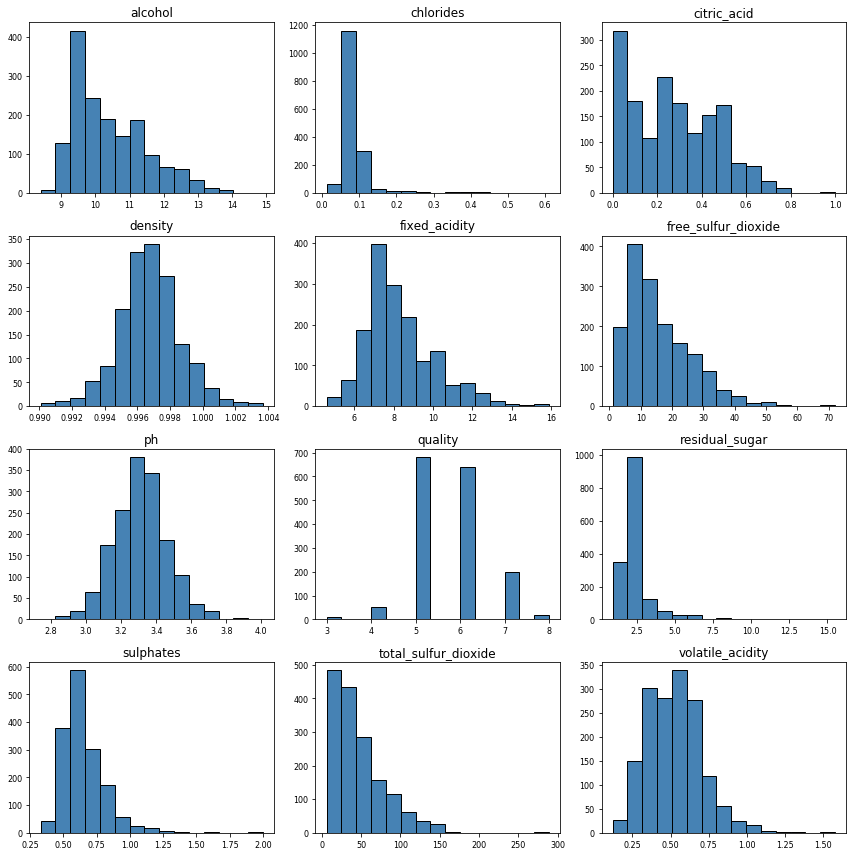

In [63]:
f, ax = plt.subplots(figsize=(10,10))
red_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.show()

### Bivariate analysis

**Heatmap**

Helps identify correlations between variables in a dataset.

Correlation measures the strength of association between two variables and the direction of the relationship. A high positive values indicates a strong correlation that indicates that when one variable is high the other is also likely to be high. A value close to zero indicates no correlation. Negative values indicate that an increase in one variable is liked with a decrease in the other variable.

Pandas contains a method ``` df.corr ``` on Series and DataFrame objects that help us find the correlation using the following correlation algorithms

- pearson (default)
- kendall
- spearman

> Find the correlation between variables in the wines df

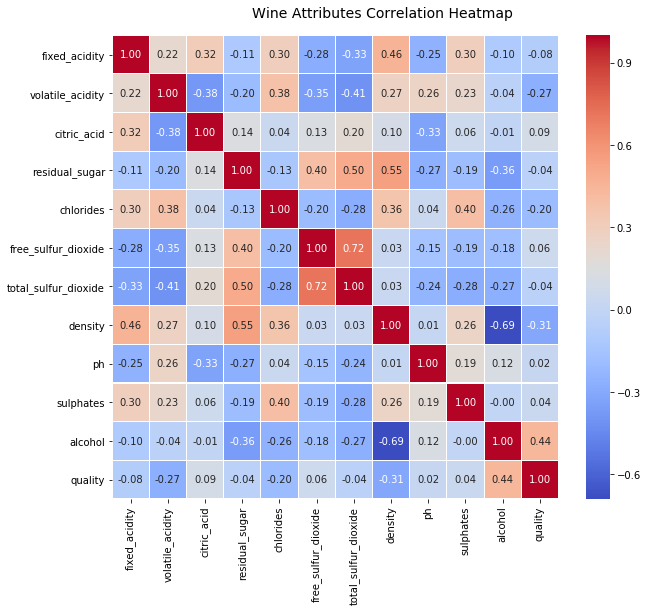

In [72]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

# Types of Machine Learning Algorithms

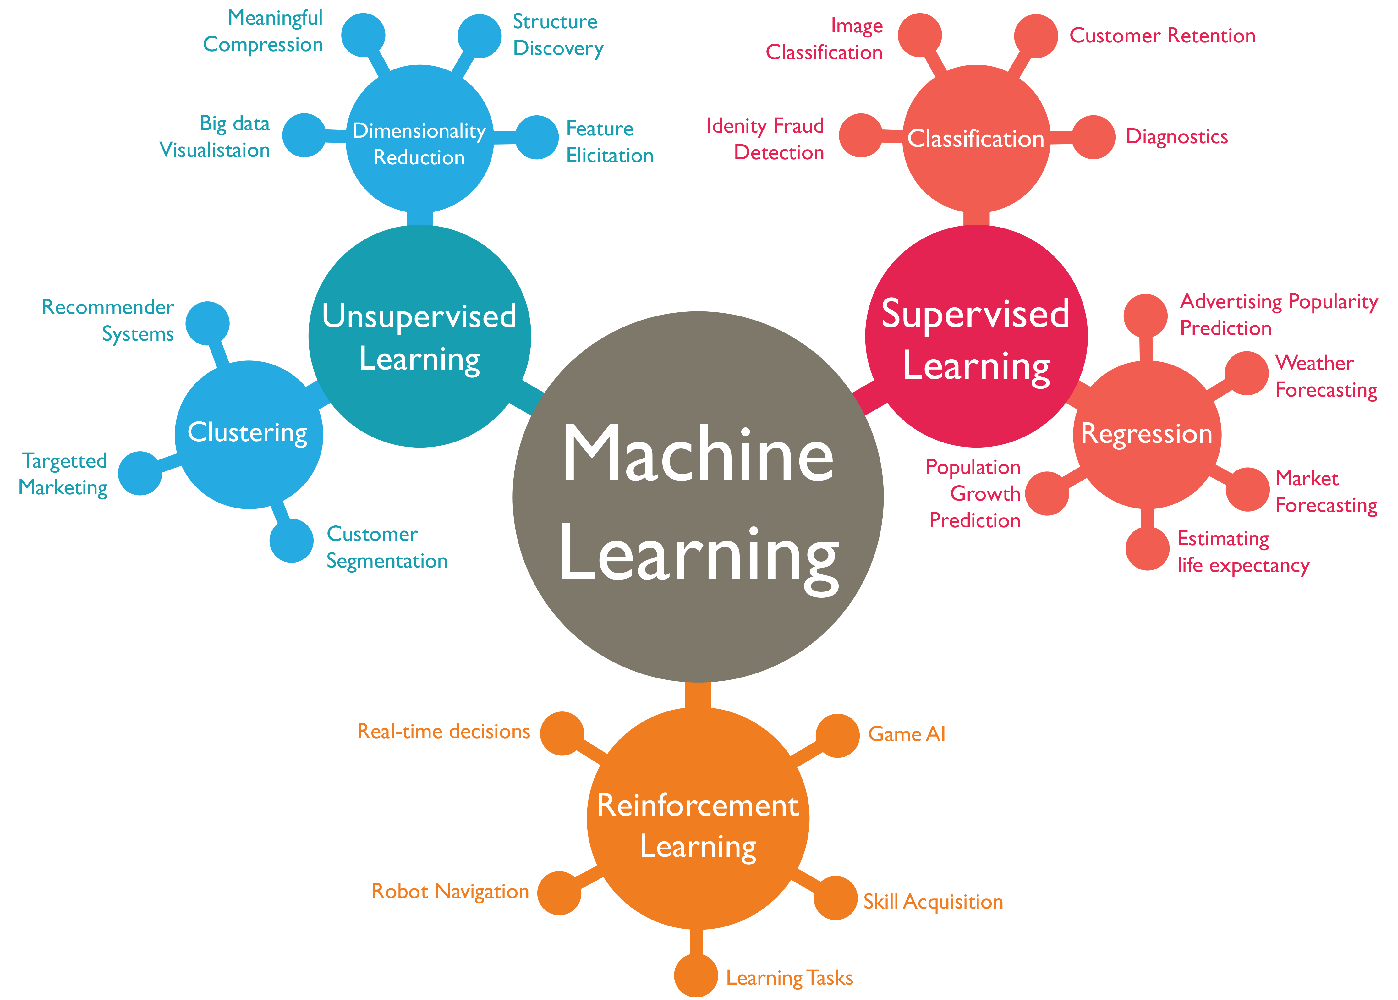

image source: https://cybrml.com/2017/01/23/ml-in-cs-4-machine-learning-technical-review/

## Classification 



## Regression

## Clustering

- Supervised:classification/regression
  - Unsupervised:clustering/association_mining
  - Reinforecement_learning
  - supervised learning nomenclature
    - instance/feature/class/train/predict

## Scikit-Learn API basics

# KNN Classification

## Advantages and Disadvantages:

Advantages: 
+ Simple to understand and explain
+ Model training is fast
+ Can be used for classification and regression

Disadvantages:
- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods